Mounted at /content/drive


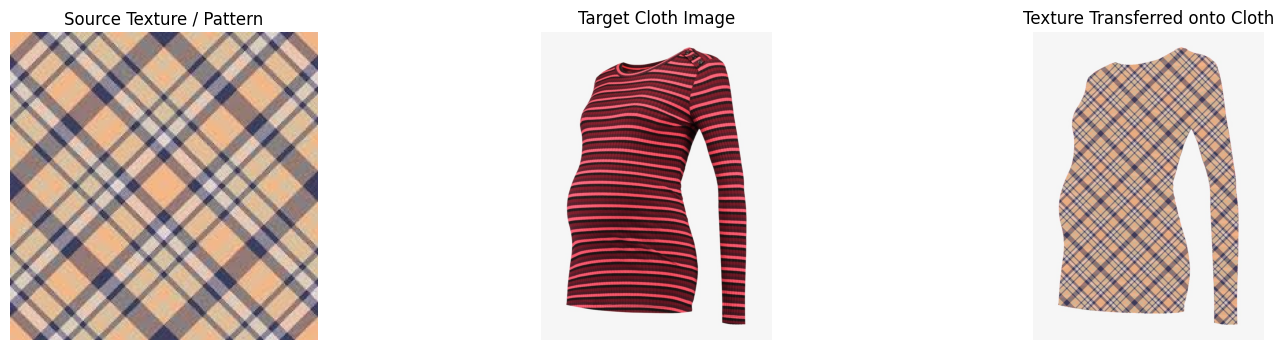

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

source_texture_path = '/content/drive/MyDrive/texture.jpg'
target_img_path = '/content/drive/MyDrive/02137_00.jpg'
target_mask_path = '/content/drive/MyDrive/cloth-mask/02137_00.jpg'

texture_img = cv2.imread(source_texture_path)
tgt_img = cv2.imread(target_img_path)
tgt_mask = cv2.imread(target_mask_path, cv2.IMREAD_GRAYSCALE)
_, tgt_mask = cv2.threshold(tgt_mask, 127, 255, cv2.THRESH_BINARY)

h_mask, w_mask = tgt_mask.shape
h_tex, w_tex = texture_img.shape[:2]

tile_rows = int(np.ceil(h_mask / h_tex))
tile_cols = int(np.ceil(w_mask / w_tex))
tiled_texture = np.tile(texture_img, (tile_rows, tile_cols, 1))[:h_mask, :w_mask, :]
overlaid_texture = tiled_texture

mask_bool = (tgt_mask == 255)
mask_3ch = np.stack([mask_bool]*3, axis=2)

tgt_img_norm = tgt_img / 255.0
texture_norm = overlaid_texture / 255.0

blend_factor = 0.93
blended = tgt_img_norm * (1 - blend_factor) + texture_norm * blend_factor
final = tgt_img_norm.copy()
final[mask_3ch] = blended[mask_3ch]
final = (final * 255).astype(np.uint8)

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title("Source Texture / Pattern")
plt.imshow(cv2.cvtColor(texture_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Target Cloth Image")
plt.imshow(cv2.cvtColor(tgt_img, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Texture Transferred onto Cloth")
plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()
